# Data Proficiency Project Plan

---

## 1. Project Overview

**Objective:**  
Analyze participant data from the Everything Data mentorship cohort to understand demographics, motivations, skill levels, and factors influencing graduation. Use data-driven insights to recommend improvements for future cohorts.

**Scope:**

- Data cleaning and preprocessing
- Exploratory data analysis (EDA)
- Predictive modeling for graduation status
- Evaluation of models and actionable recommendations

**Deliverables:**

- Cleaned dataset
- EDA visualizations and summary statistics
- Classification models predicting graduation status
- Model evaluation metrics (accuracy, precision, recall, F1-score)
- Recommendations for program improvement
- README explaining workflow

---

## 2. Project Workflow

### Step 1: Data Acquisition & Inspection

- Load dataset using Python (`pandas`).
- Inspect data types, missing values, and general structure.
- Identify categorical vs. numerical variables.

### Step 2: Data Cleaning & Preprocessing

- Handle missing values (imputation or removal).
- Standardize categorical entries (e.g., gender, country).
- Encode categorical variables (One-Hot Encoding or Label Encoding).
- Convert timestamps into usable features if necessary (e.g., month/year of registration).
- Check for duplicates and inconsistencies.

### Step 3: Exploratory Data Analysis (EDA)

**Demographics Analysis:**

- Age range distribution
- Gender and country breakdown
- Track-wise participant distribution

**Experience & Motivation:**

- Years of learning experience vs. graduation rate
- Hours per week availability vs. performance
- Motivation for joining analysis (word cloud or category frequency)

**Performance Metrics:**

- Distribution of aptitude test completion and total scores
- Correlation matrix between numerical features and graduation status

**Visualizations:**  
Histograms, bar charts, boxplots, heatmaps (Matplotlib/Seaborn).

### Step 4: Predictive Modeling

**Goal:** Predict graduation status.

**Feature Selection:** Experience, hours/week, total score, self-assessed skill level, motivation, etc.

**Models to Compare:**

- Logistic Regression
- Random Forest Classifier (or Gradient Boosting)

- Split data into train/test (e.g., 80/20)
- Train models and tune hyperparameters (if necessary)

### Step 5: Model Evaluation

**Metrics to report:**

- Accuracy
- Precision
- Recall
- F1-score

- Confusion matrix visualization
- Compare models and choose the best-performing one

### Step 6: Insights & Recommendations

- Identify key factors influencing graduation
- Provide actionable recommendations:
  - Ideal participant profile
  - Suggested weekly learning hours
  - Support mechanisms for participants at risk of dropping out
- Present findings with clear visuals and narrative

---

## 3. Timeline

| Task | Start Date | End Date |
| --- | --- | --- |
| Data Inspection & Cleaning | Aug 21 | Aug 23 |
| EDA & Visualization | Aug 24 | Aug 26 |
| Predictive Modeling | Aug 27 | Aug 30 |
| Model Evaluation | Aug 31 | Sep 1 |
| Insights & Recommendations | Sep 2 | Sep 4 |
| Prepare Report & Dashboard | Sep 5 | Sep 11 |
| Submission & Presentation | Sep 12 | Sep 12 |

---

## 4. Tools & Technologies

- Python: `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`
- Optional: Jupyter Notebook or Google Colab
- Reporting: PDF/Markdown with visualizations or an interactive dashboard


# Step 1: Data Acquisition & Inspection

In [1]:
# Load dataset
import pandas as pd 
df = pd.read_csv("Cohort 3 DS.csv")

# Shape of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (63, 15)


In [2]:
# Preview the dataset
print("Preview of the dataset:")
df.head()

Preview of the dataset:


,Timestamp,Id. No,Age range,Gender,Country,Where did you hear about Everything Data?,How many years of learning experience do you have in the field of data?,Which track are you applying for?,How many hours per week can you commit to learning?,What is your main aim for joining the mentorship program?,What is your motivation to join the Everything Data mentorship program?,How best would you describe your skill level in the track you are applying for?,Have you completed the everything data aptitude test for your track?,Total score,Graduated
0,12/1/2024 23:50:47,DS301,18-24 years,Male,Kenya,Word of mouth,Less than six months,Data science,less than 6 hours,Upskill,to enter into the data analysis career,Beginner - I have NO learning or work experien...,Yes,58.67,No
1,12/3/2024 9:35:19,DS302,25-34 years,Male,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,To grow and improve my skills in data science ...,Elementary - I have theoretical understanding ...,Yes,70.00,No
2,12/3/2024 19:16:49,DS303,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,I’m motivated to join Everything Data to enhan...,Intermediate - I have theoretical knowledge an...,Yes,64.33,Yes
3,12/3/2024 12:52:36,DS304,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,7-14 hours,Upskill,I'd like to upskill and Join the Data Community,Intermediate - I have theoretical knowledge an...,Yes,75.00,No
4,12/3/2024 18:12:27,DS305,18-24 years,Male,Kenya,WhatsApp,Less than six months,Data science,7-14 hours,Upskill,I aim to join the mentorship program to enhanc...,Beginner - I have NO learning or work experien...,Yes,59.00,No


In [3]:
# Check column names and data types
df.dtypes

Timestamp                                                                           object
Id. No                                                                              object
Age range                                                                           object
Gender                                                                              object
Country                                                                             object
Where did you hear about Everything Data?                                           object
How many years of learning experience do you have in the field of data?             object
Which track are you applying for?                                                   object
How many hours per week can you commit to learning?                                 object
What is your main aim for joining the mentorship program?                           object
What is your motivation to join the Everything Data mentorship program?             object

In [4]:
# Summary statistics (numerical only)
df.describe()

,Total score
count,63.000000
mean,69.261905
std,7.238371
min,58.330000
25%,64.000000
50%,67.670000
75%,74.330000
max,83.670000


In [5]:
# inspect unique values for categorical features
categorical_col = df.select_dtypes(include= ['object']).columns
for col in categorical_col:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique()
          )


Unique values in 'Timestamp':
['12/1/2024 23:50:47' '12/3/2024 9:35:19' '12/3/2024 19:16:49'
 '12/3/2024 12:52:36' '12/3/2024 18:12:27' '11/27/2024 10:40:39'
 '11/28/2024 14:42:45' '12/3/2024 12:58:05' '12/1/2024 22:02:23'
 '12/2/2024 13:29:00' '12/3/2024 16:47:48' '12/2/2024 23:59:16'
 '12/3/2024 14:19:12' '11/27/2024 11:25:40' '11/28/2024 9:11:46'
 '12/3/2024 11:18:47' '11/27/2024 9:19:48' '11/28/2024 20:17:51'
 '12/2/2024 23:06:17' '12/2/2024 13:33:40' '12/3/2024 7:07:40'
 '12/2/2024 16:35:54' '11/28/2024 16:27:08' '12/3/2024 12:59:55'
 '11/27/2024 10:19:12' '11/28/2024 19:57:13' '12/3/2024 13:30:40'
 '11/27/2024 17:00:08' '12/2/2024 18:02:53' '12/3/2024 12:39:32'
 '12/3/2024 16:53:38' '12/1/2024 22:16:29' '12/2/2024 13:45:42'
 '12/2/2024 14:45:22' '12/2/2024 16:11:30' '12/1/2024 18:49:03'
 '12/2/2024 23:41:04' '12/3/2024 20:23:34' '11/28/2024 18:20:02'
 '12/2/2024 1:55:38' '12/1/2024 12:40:47' '12/3/2024 10:11:01'
 '12/3/2024 16:00:30' '12/1/2024 21:44:14' '11/29/2024 12:54:58'
 '

In [6]:
# check for missing values
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


Timestamp                                                                          0
Id. No                                                                             0
Age range                                                                          0
Gender                                                                             0
Country                                                                            0
Where did you hear about Everything Data?                                          0
How many years of learning experience do you have in the field of data?            0
Which track are you applying for?                                                  0
How many hours per week can you commit to learning?                                0
What is your main aim for joining the mentorship program?                          0
What is your motivation to join the Everything Data mentorship program?            0
How best would you describe your skill level in the track you are

In [7]:
print("\nNumber of duplicate rows:", df.duplicated().sum())



Number of duplicate rows: 0


# Step 1 Summary: Data Acquisition & Inspection

- **Dataset Shape:** 63 rows × 15 columns  
- **Data Types:** 14 categorical (`object`), 1 numerical (`float64` → *Total score*)  
- **Preview:** Data contains participant demographics, motivations, and scores.  
- **Numerical Summary (Total Score):**
  - Mean: 69.26
  - Min: 58.33
  - Max: 83.67
  - Std: 7.24
- **Categorical Highlights:**
  - Age Ranges: 18–24, 25–34, 35–44, 45–54
  - Gender: Male, Female
  - Country: Kenya, South Africa
  - Tracks: Data Science, Data Analysis
  - Aptitude Test: Yes/No
  - Graduation Status: Yes/No
- **Missing Values:** 0  
- **Duplicates:** 0  

**Conclusion:** Dataset is complete, clean at the structural level, and ready for **Step 2: Data Cleaning & Preprocessing**.


## Step 2: Data Cleaning & Preprocessing  

In this phase, the dataset will be prepared for analysis and modeling. The main tasks include:  

- Simplifying column names for readability and consistency.  
- Handling missing values through imputation or removal where necessary.  
- Standardizing categorical entries (e.g., gender, country) to avoid inconsistencies.  
- Encoding categorical variables using One-Hot Encoding or Label Encoding.  
- Extracting useful features from timestamps (e.g., deriving the month from registration dates).  
- Checking for and removing duplicates or inconsistent records.  

This step ensures that the dataset is structured, clean, and ready for exploration and modeling in later phases.


In [8]:
df.columns

Index(['Timestamp', 'Id. No', 'Age range', 'Gender', 'Country',
       'Where did you hear about Everything Data?',
       'How many years of learning experience do you have in the field of data?',
       'Which track are you applying for?',
       'How many hours per week can you commit to learning?',
       'What is your main aim for joining the mentorship program?',
       'What is your motivation to join the Everything Data mentorship program?',
       'How best would you describe your skill level in the track you are applying for?',
       'Have you completed the everything data aptitude test for your track?',
       'Total score', 'Graduated'],
      dtype='object')

1) Simplify / Standardize Column Names

In [9]:
raw = df.copy()

In [10]:
rename_map = {
    'Timestamp': 'timestamp',
    'Id. No': 'id',
    'Age range': 'age_range',
    'Gender': 'gender',
    'Country': 'country',
    'Where did you hear about Everything Data?': 'ref_source',
    'How many years of learning experience do you have in the field of data?': 'experience_years',
    'Which track are you applying for?': 'track',
    'How many hours per week can you commit to learning?': 'hours_per_week',
    'What is your main aim for joining the mentorship program?': 'main_aim',
    'What is your motivation to join the Everything Data mentorship program?': 'motivation',
    'How best would you describe your skill level in the track you are applying for?': 'skill_level',
    'Have you completed the everything data aptitude test for your track?': 'aptitude_completed',
    'Total score': 'total_score',
    'Graduated': 'graduated'
}

df2 = raw.rename(columns= rename_map)
df2.columns = [c.strip().lower() for c in df2.columns]
df2.head()


,timestamp,id,age_range,gender,country,ref_source,experience_years,track,hours_per_week,main_aim,motivation,skill_level,aptitude_completed,total_score,graduated
0,12/1/2024 23:50:47,DS301,18-24 years,Male,Kenya,Word of mouth,Less than six months,Data science,less than 6 hours,Upskill,to enter into the data analysis career,Beginner - I have NO learning or work experien...,Yes,58.67,No
1,12/3/2024 9:35:19,DS302,25-34 years,Male,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,To grow and improve my skills in data science ...,Elementary - I have theoretical understanding ...,Yes,70.00,No
2,12/3/2024 19:16:49,DS303,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,more than 14 hours,Upskill,I’m motivated to join Everything Data to enhan...,Intermediate - I have theoretical knowledge an...,Yes,64.33,Yes
3,12/3/2024 12:52:36,DS304,18-24 years,Female,Kenya,WhatsApp,6 months - 1 year,Data science,7-14 hours,Upskill,I'd like to upskill and Join the Data Community,Intermediate - I have theoretical knowledge an...,Yes,75.00,No
4,12/3/2024 18:12:27,DS305,18-24 years,Male,Kenya,WhatsApp,Less than six months,Data science,7-14 hours,Upskill,I aim to join the mentorship program to enhanc...,Beginner - I have NO learning or work experien...,Yes,59.00,No


In [11]:
categorical_col = df2.select_dtypes(include= ['object']).columns
for col in categorical_col:
    print(f"\nUnique values in '{col}':")
    print(df2[col].unique()
          )


Unique values in 'timestamp':
['12/1/2024 23:50:47' '12/3/2024 9:35:19' '12/3/2024 19:16:49'
 '12/3/2024 12:52:36' '12/3/2024 18:12:27' '11/27/2024 10:40:39'
 '11/28/2024 14:42:45' '12/3/2024 12:58:05' '12/1/2024 22:02:23'
 '12/2/2024 13:29:00' '12/3/2024 16:47:48' '12/2/2024 23:59:16'
 '12/3/2024 14:19:12' '11/27/2024 11:25:40' '11/28/2024 9:11:46'
 '12/3/2024 11:18:47' '11/27/2024 9:19:48' '11/28/2024 20:17:51'
 '12/2/2024 23:06:17' '12/2/2024 13:33:40' '12/3/2024 7:07:40'
 '12/2/2024 16:35:54' '11/28/2024 16:27:08' '12/3/2024 12:59:55'
 '11/27/2024 10:19:12' '11/28/2024 19:57:13' '12/3/2024 13:30:40'
 '11/27/2024 17:00:08' '12/2/2024 18:02:53' '12/3/2024 12:39:32'
 '12/3/2024 16:53:38' '12/1/2024 22:16:29' '12/2/2024 13:45:42'
 '12/2/2024 14:45:22' '12/2/2024 16:11:30' '12/1/2024 18:49:03'
 '12/2/2024 23:41:04' '12/3/2024 20:23:34' '11/28/2024 18:20:02'
 '12/2/2024 1:55:38' '12/1/2024 12:40:47' '12/3/2024 10:11:01'
 '12/3/2024 16:00:30' '12/1/2024 21:44:14' '11/29/2024 12:54:58'
 '

2. Basic String Cleaning for Categorical Columns

In [12]:
cat_cols = df.select_dtypes(include="object").columns.tolist()

def clean_str(s):
    if pd.isna(s): 
        return s
    s = str(s).strip()        # remove leading/trailing whitespace
    s = " ".join(s.split())   # replace multiple spaces with a single space
    return s

for c in cat_cols:
    df[c] = df[c].apply(clean_str)


In [13]:
categorical_col = df2.select_dtypes(include= ['object']).columns
for col in categorical_col:
    print(f"\nUnique values in '{col}':")
    print(df2[col].unique())


Unique values in 'timestamp':
['12/1/2024 23:50:47' '12/3/2024 9:35:19' '12/3/2024 19:16:49'
 '12/3/2024 12:52:36' '12/3/2024 18:12:27' '11/27/2024 10:40:39'
 '11/28/2024 14:42:45' '12/3/2024 12:58:05' '12/1/2024 22:02:23'
 '12/2/2024 13:29:00' '12/3/2024 16:47:48' '12/2/2024 23:59:16'
 '12/3/2024 14:19:12' '11/27/2024 11:25:40' '11/28/2024 9:11:46'
 '12/3/2024 11:18:47' '11/27/2024 9:19:48' '11/28/2024 20:17:51'
 '12/2/2024 23:06:17' '12/2/2024 13:33:40' '12/3/2024 7:07:40'
 '12/2/2024 16:35:54' '11/28/2024 16:27:08' '12/3/2024 12:59:55'
 '11/27/2024 10:19:12' '11/28/2024 19:57:13' '12/3/2024 13:30:40'
 '11/27/2024 17:00:08' '12/2/2024 18:02:53' '12/3/2024 12:39:32'
 '12/3/2024 16:53:38' '12/1/2024 22:16:29' '12/2/2024 13:45:42'
 '12/2/2024 14:45:22' '12/2/2024 16:11:30' '12/1/2024 18:49:03'
 '12/2/2024 23:41:04' '12/3/2024 20:23:34' '11/28/2024 18:20:02'
 '12/2/2024 1:55:38' '12/1/2024 12:40:47' '12/3/2024 10:11:01'
 '12/3/2024 16:00:30' '12/1/2024 21:44:14' '11/29/2024 12:54:58'
 '

3. Standardize Key Categorical Entries

In [14]:
 # Gender -> {'Male','Female'}
df2["gender"] = df2["gender"].str.title()

# Country -> title case (handles 'Kenya', 'South Africa', etc.)
df2["country"] = df2["country"].str.title()

# Track -> title case but keep canonical forms
df2["track"] = df2["track"].str.title().replace({
    "Data Science": "Data Science",
    "Data Analysis": "Data Analysis",
})

# Age ranges: keep as-is but ensure consistent hyphen and spacing
df2["age_range"] = df2["age_range"].str.replace(r"\s*-\s*", "-", regex=True).str.replace("Years", "years")

# Hours per week -> normalize bucket labels
df2["hours_per_week"] = (
    df2["hours_per_week"]
    .str.lower()
    .replace({
        "less than 6 hours": "<6",
        "7-14 hours": "7-14",
        "more than 14 hours": ">14",
    })
)

# Experience buckets -> normalize labels
df2["experience_years"] = (
    df2["experience_years"]
    .str.lower()
    .replace({
        "less than six months": "<6m",
        "6 months - 1 year": "6m-1y",
        "1-3 years": "1-3y",
        "4-6 years": "4-6y",
    })
)

# # Yes/No binaries -> 1/0
# yes_no_map = {"Yes": 1, "No": 0, "yes": 1, "no": 0}
# df2["aptitude_completed"] = df2["aptitude_completed"].map(yes_no_map).astype("Int64")
# df2["graduated"] = df2["graduated"].map(yes_no_map).astype("Int64")

# Skill level -> ordered categories
skill_order = [
    "Beginner - I have NO learning or work experience in data analysis/ data science",
    "Elementary - I have theoretical understanding of basic data analysis/ data science concepts",
    "Intermediate - I have theoretical knowledge and experience in data analysis/ data science",
]
df2["skill_level"] = pd.Categorical(df2["skill_level"], categories=skill_order, ordered=True)


In [15]:
print(df2.head())

            timestamp     id    age_range  gender country     ref_source  \
0  12/1/2024 23:50:47  DS301  18-24 years    Male   Kenya  Word of mouth   
1   12/3/2024 9:35:19  DS302  25-34 years    Male   Kenya       WhatsApp   
2  12/3/2024 19:16:49  DS303  18-24 years  Female   Kenya       WhatsApp   
3  12/3/2024 12:52:36  DS304  18-24 years  Female   Kenya       WhatsApp   
4  12/3/2024 18:12:27  DS305  18-24 years    Male   Kenya       WhatsApp   

  experience_years         track hours_per_week main_aim  \
0              <6m  Data Science             <6  Upskill   
1            6m-1y  Data Science            >14  Upskill   
2            6m-1y  Data Science            >14  Upskill   
3            6m-1y  Data Science           7-14  Upskill   
4              <6m  Data Science           7-14  Upskill   

                                          motivation  \
0             to enter into the data analysis career   
1  To grow and improve my skills in data science ...   
2  I’m motivat

In [16]:
df2.dtypes

timestamp               object
id                      object
age_range               object
gender                  object
country                 object
ref_source              object
experience_years        object
track                   object
hours_per_week          object
main_aim                object
motivation              object
skill_level           category
aptitude_completed      object
total_score            float64
graduated               object
dtype: object

In [17]:
categorical_col = df2.select_dtypes(include= ['object']).columns
for col in categorical_col:
    print(f"\nUnique values in '{col}':")
    print(df2[col].unique())


Unique values in 'timestamp':
['12/1/2024 23:50:47' '12/3/2024 9:35:19' '12/3/2024 19:16:49'
 '12/3/2024 12:52:36' '12/3/2024 18:12:27' '11/27/2024 10:40:39'
 '11/28/2024 14:42:45' '12/3/2024 12:58:05' '12/1/2024 22:02:23'
 '12/2/2024 13:29:00' '12/3/2024 16:47:48' '12/2/2024 23:59:16'
 '12/3/2024 14:19:12' '11/27/2024 11:25:40' '11/28/2024 9:11:46'
 '12/3/2024 11:18:47' '11/27/2024 9:19:48' '11/28/2024 20:17:51'
 '12/2/2024 23:06:17' '12/2/2024 13:33:40' '12/3/2024 7:07:40'
 '12/2/2024 16:35:54' '11/28/2024 16:27:08' '12/3/2024 12:59:55'
 '11/27/2024 10:19:12' '11/28/2024 19:57:13' '12/3/2024 13:30:40'
 '11/27/2024 17:00:08' '12/2/2024 18:02:53' '12/3/2024 12:39:32'
 '12/3/2024 16:53:38' '12/1/2024 22:16:29' '12/2/2024 13:45:42'
 '12/2/2024 14:45:22' '12/2/2024 16:11:30' '12/1/2024 18:49:03'
 '12/2/2024 23:41:04' '12/3/2024 20:23:34' '11/28/2024 18:20:02'
 '12/2/2024 1:55:38' '12/1/2024 12:40:47' '12/3/2024 10:11:01'
 '12/3/2024 16:00:30' '12/1/2024 21:44:14' '11/29/2024 12:54:58'
 '

In [18]:
numerical = df2.select_dtypes(include= ["int64"]).columns
for col in numerical:
    print(f"\nUnique values in '{col}':")
    print(df2[col].unique())

4. Timestamp → Month Feature

In [19]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated'],
      dtype='object')

In [20]:
# Parse timestamp (day-first appears unlikely; dataset seems M/D/Y H:M:S)
df2['timestamp'] = pd.to_datetime(df2['timestamp'], errors= 'coerce', infer_datetime_format= True)

# Extract month number and month name
df2["month"] = df2["timestamp"].dt.month
df2["month_name"] = df2["timestamp"].dt.month_name().str[:3]


C:\Users\HomePC\AppData\Local\Temp\ipykernel_21632\1438191447.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2['timestamp'] = pd.to_datetime(df2['timestamp'], errors= 'coerce', infer_datetime_format= True)


In [21]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name'],
      dtype='object')

In [22]:
df2[["month", "month_name"]].head()

,month,month_name
0,12,Dec
1,12,Dec
2,12,Dec
3,12,Dec
4,12,Dec


In [23]:
categorical_col = df2.select_dtypes(include= ['object']).columns
for col in categorical_col:
    print(f"\nUnique values in '{col}':")
    print(df2[col].unique())


Unique values in 'id':
['DS301' 'DS302' 'DS303' 'DS304' 'DS305' 'DS306' 'DS307' 'DS308' 'DS309'
 'DS310' 'DS311' 'DS312' 'DS313' 'DS314' 'DS315' 'DS316' 'DS317' 'DS318'
 'DS319' 'DS320' 'DS321' 'DS322' 'DS323' 'DS324' 'DS325' 'DS326' 'DS327'
 'DS328' 'DS329' 'DS330' 'DS331' 'DS332' 'DS333' 'DS334' 'DS335' 'DS336'
 'DS337' 'DS338' 'DS339' 'DS340' 'DS341' 'DS342' 'DS343' 'DS344' 'DS345'
 'DS346' 'DS347' 'DS348' 'DS349' 'DS350' 'DS351' 'DS352' 'DS353' 'DS354'
 'DS355' 'DS356' 'DS357' 'DS358' 'DS359' 'DS360' 'DS361' 'DS362' 'DS363']

Unique values in 'age_range':
['18-24 years' '25-34 years' '45-54 years' '35-44 years']

Unique values in 'gender':
['Male' 'Female']

Unique values in 'country':
['Kenya' 'South Africa']

Unique values in 'ref_source':
['Word of mouth' 'WhatsApp' 'Twitter' 'LinkedIn'
 'through a geeks for geeks webinar' 'Instagram']

Unique values in 'experience_years':
['<6m' '6m-1y' '1-3y' '4-6y']

Unique values in 'track':
['Data Science' 'Data Analysis']

Unique values i

5) Handle Missing Values (Robust Defaults)

In [24]:
df2.isna().sum()

timestamp             0
id                    0
age_range             0
gender                0
country               0
ref_source            0
experience_years      0
track                 0
hours_per_week        0
main_aim              0
motivation            0
skill_level           0
aptitude_completed    0
total_score           0
graduated             0
month                 0
month_name            0
dtype: int64

6) Check Duplicates & Obvious Inconsistencies

In [25]:
# check by full row
df2.duplicated().sum()

0

In [26]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name'],
      dtype='object')

In [27]:
# Duplicates by ID (if ID should be unique)
df2["id"].duplicated().sum()

0

7) Simple text feature from motivation


### Why Engineer a Proxy Feature for `motivation`?

The `motivation` column contains free-text responses, which makes it a **high-cardinality feature** with potentially hundreds or thousands of unique entries. Directly encoding such data (e.g., through one-hot encoding or label encoding) would create a sparse, high-dimensional dataset that is inefficient and may not improve model performance.

To address this, a **proxy feature** is engineered by calculating the **length of each text response**. This simple numeric representation reduces the complexity of the free-text field while still capturing useful information (e.g., longer responses may indicate stronger or more detailed motivations).

This approach ensures:
- **Efficiency**: Converts unstructured text into a single numeric feature.  
- **Interpretability**: Easy to understand and explain in analysis.  
- **Model Performance**: Provides structured input that models can process effectively.  


In [28]:
df2["motivation_len"] = df2["motivation"].fillna("").str.len()
df2["motivation_len"].head()

0     38
1    106
2    196
3     47
4    172
Name: motivation_len, dtype: int64

## Data Cleaning and Preparation

This phase focuses on transforming the raw dataset into a clean, consistent, and analysis-ready form.  
The main goals were to standardize structure, handle missing or inconsistent values, and engineer simple yet meaningful features to improve downstream modeling.

Steps completed:
1. **Simplify / Standardize Column Names** – ensured consistent, machine-friendly naming.  
2. **Basic String Cleaning for Categorical Columns** – removed extra spaces, fixed casing, etc.  
3. **Standardize Key Categorical Entries** – merged duplicates (e.g., variations of the same category).  
4. **Timestamp → Month Feature** – extracted month from dates for seasonality patterns.  
5. **Handle Missing Values (Robust Defaults)** – imputed with sensible defaults.  
6. **Check Duplicates & Obvious Inconsistencies** – removed redundant records.  
7. **Simple Text Feature from `motivation`** – engineered a proxy feature (`text_length`) to capture information from free-text input.  

Steps deferred or discarded:
- **Encode Categorical Variables** – deferred to modeling stage.  


## Exploratory Data Analysis (EDA)

In this phase, we explore the cleaned dataset to uncover patterns, trends, and insights across participant demographics, experience, motivations, and performance metrics.  
The analysis is structured into three main areas:

### 1. Demographics Analysis
- Age range distribution  
- Gender and country breakdown  
- Track-wise participant distribution  

### 2. Experience & Motivation
- Years of learning experience vs. graduation rate  
- Hours per week availability vs. performance  
- Motivation for joining analysis (via word cloud or category frequency)  

### 3. Performance Metrics
- Distribution of aptitude test completion and total scores  
- Correlation matrix between numerical features and graduation status  

### Visualizations
Histograms, bar charts, boxplots, and heatmaps will be used (via Matplotlib/Seaborn) to support interpretation and highlight key insights.


In [29]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name', 'motivation_len'],
      dtype='object')

# Demographics Analysis

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Age Range Distribution

C:\Users\HomePC\AppData\Local\Temp\ipykernel_21632\1151470220.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df2, x= 'age_range', palette= 'pastel', order= df2['age_range'].value_counts().index)


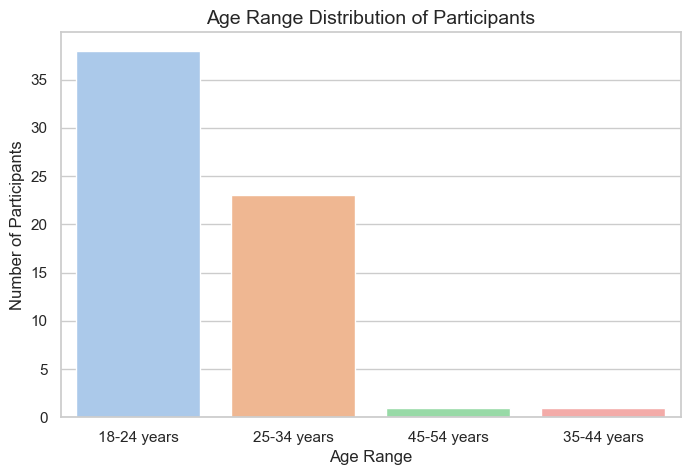

In [31]:
# Age range count plot

plt.figure(figsize= (8,5))
sns.countplot(data= df2, x= 'age_range', palette= 'pastel', order= df2['age_range'].value_counts().index)
plt.title('Age Range Distribution of Participants', fontsize= 14)
plt.xlabel('Age Range')
plt.ylabel('Number of Participants')
plt.show()

In [39]:
df2["age_range"].value_counts()

age_range
18-24 years    38
25-34 years    23
45-54 years     1
35-44 years     1
Name: count, dtype: int64

Majority of the participants are betweeb 18 - 24 years

age_range

18-24 years    38

25-34 years    23

45-54 years     1

35-44 years     1


# Gender Distribution

In [32]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name', 'motivation_len'],
      dtype='object')

C:\Users\HomePC\AppData\Local\Temp\ipykernel_21632\99370645.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2, x='gender', palette='Set2', order=df2['gender'].value_counts().index)


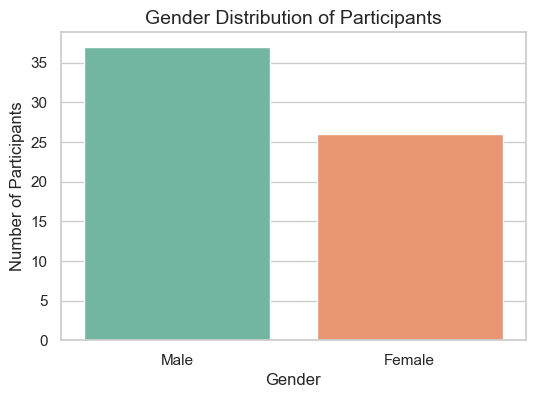

In [33]:
# Gender count plot
plt.figure(figsize=(6,4))
sns.countplot(data=df2, x='gender', palette='Set2', order=df2['gender'].value_counts().index)
plt.title('Gender Distribution of Participants', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.show()


In [40]:
df2.gender.value_counts()

gender
Male      37
Female    26
Name: count, dtype: int64

More males than females joined the program with 37 males

# Country Distribution

In [35]:
df2.columns

Index(['timestamp', 'id', 'age_range', 'gender', 'country', 'ref_source',
       'experience_years', 'track', 'hours_per_week', 'main_aim', 'motivation',
       'skill_level', 'aptitude_completed', 'total_score', 'graduated',
       'month', 'month_name', 'motivation_len'],
      dtype='object')

C:\Users\HomePC\AppData\Local\Temp\ipykernel_21632\3925516446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df2, x= "country", palette= "Set3", order= df2["country"].value_counts().index)


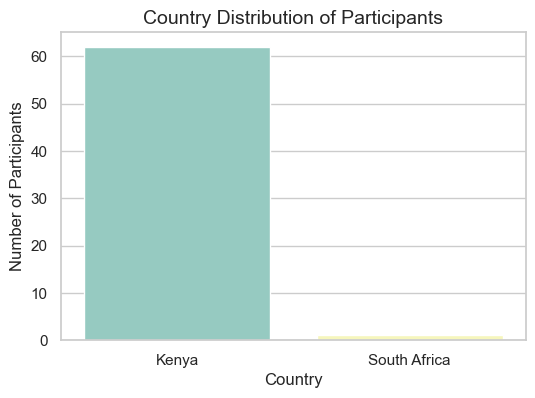

In [37]:
# Country Count Plot
plt.figure(figsize=(6, 4))
sns.countplot(data= df2, x= "country", palette= "Set3", order= df2["country"].value_counts().index)
plt.title("Country Distribution of Participants", fontsize= 14)
plt.xlabel("Country")
plt.ylabel("Number of Participants")
plt.show()

In [41]:
df2.country.value_counts()

country
Kenya           62
South Africa     1
Name: count, dtype: int64

Almost all participants are from Kenya with 62 and 1 from South Africa

# Track Applied For

C:\Users\HomePC\AppData\Local\Temp\ipykernel_21632\2793836081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df2, x= "track", palette= "coolwarm", order= df2["track"].value_counts().index)


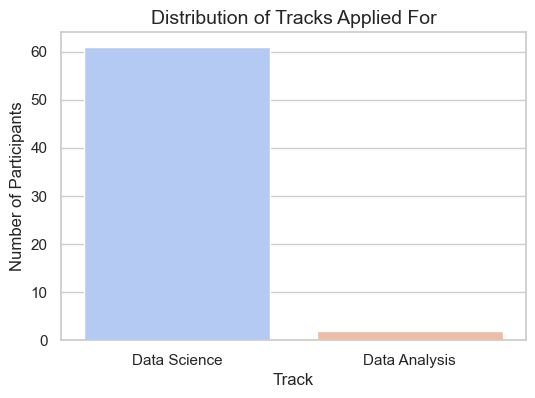

In [38]:
# Track Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data= df2, x= "track", palette= "coolwarm", order= df2["track"].value_counts().index)
plt.title("Distribution of Tracks Applied For", fontsize= 14)
plt.xlabel("Track")
plt.ylabel("Number of Participants")
plt.show()

In [42]:
df2.track.value_counts()

track
Data Science     61
Data Analysis     2
Name: count, dtype: int64

Majority of the applicants applied to the data science track with 61 and 2 in data analysis

## Demographics Analysis – Key Inferences

### 1️⃣ Age Range Distribution
- The majority of participants are **18-24 years old**.  
- Distribution:
  - 18-24 years: 38  
  - 25-34 years: 23  
  - 35-44 years: 1  
  - 45-54 years: 1  

### 2️⃣ Gender Distribution
- More **males** joined the program than females.  
- Distribution:
  - Male: 37  
  - Female: 26  

### 3️⃣ Country Distribution
- Almost all participants are from **Kenya**.  
- Distribution:
  - Kenya: 62  
  - South Africa: 1  

### 4️⃣ Track Applied For
- Most applicants applied to the **Data Science track**.  
- Distribution:
  - Data Science: 61  
  - Data Analysis: 2  

**Inference:**  
The cohort is predominantly **young (18-24 years), male, Kenyan, and primarily interested in the Data Science track**. These trends can guide engagement strategies, content planning, and mentorship resource allocation.
